<a href="https://colab.research.google.com/github/DharnidharD/Projects/blob/main/ANN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


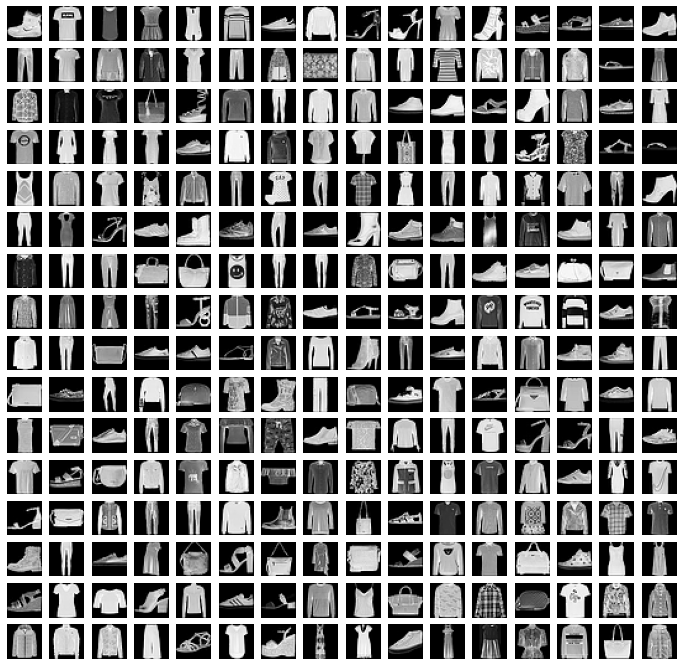

In [8]:
plt.figure(figsize = (12,12))
for i in range(256):
 plt.subplot(16,16,i+1)
 plt.axis('off')
 plt.imshow(x_train[i], cmap = 'gray')

In [9]:
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 256)

In [13]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test)

In [14]:
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
"""

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(32,(5,5), activation = 'relu', input_shape = (28,28,1)),\n    tf.keras.layers.MaxPooling2D(2,2), \n    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(256, activation = 'relu'),\n    tf.keras.layers.Dense(10, activation = 'softmax')\n"

In [15]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [16]:
ANN_model = tf.keras.models.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(512, activation ='relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [17]:
### CNN model
CNN_model = tf.keras.models.Sequential()
CNN_model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = (28,28,1)))
CNN_model.add(MaxPool2D(2,2))
CNN_model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
CNN_model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
CNN_model.add(MaxPool2D(2,2))
CNN_model.add(Conv2D(256,(3,3), activation = 'relu'))
CNN_model.add(Conv2D(256,(3,3), activation = 'relu'))
CNN_model.add(MaxPool2D(2,2))
CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation = 'relu'))
CNN_model.add(Dense(10, activation = 'softmax'))

CNN_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)        

In [18]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
ANN_model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
CNN_model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
ANN_history = ANN_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 30,
    verbose = 1 
)

Epoch 1/30
235/235 [==============================] - 24s 93ms/step - loss: 0.7891 - accuracy: 0.7046 - val_loss: 0.6062 - val_accuracy: 0.7633
Epoch 2/30
235/235 [==============================] - 22s 92ms/step - loss: 0.6139 - accuracy: 0.7696 - val_loss: 0.5051 - val_accuracy: 0.8166
Epoch 3/30
235/235 [==============================] - 21s 91ms/step - loss: 0.5644 - accuracy: 0.7865 - val_loss: 0.4691 - val_accuracy: 0.8248
Epoch 4/30
235/235 [==============================] - 22s 92ms/step - loss: 0.5297 - accuracy: 0.7994 - val_loss: 0.4510 - val_accuracy: 0.8299
Epoch 5/30
235/235 [==============================] - 21s 91ms/step - loss: 0.5116 - accuracy: 0.8049 - val_loss: 0.4344 - val_accuracy: 0.8307
Epoch 6/30
235/235 [==============================] - 21s 90ms/step - loss: 0.4933 - accuracy: 0.8126 - val_loss: 0.4580 - val_accuracy: 0.8186
Epoch 7/30
235/235 [==============================] - 21s 90ms/step - loss: 0.4823 - accuracy: 0.8171 - val_loss: 0.4376 - val_accuracy:

In [20]:
CNN_history = CNN_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 30,
    verbose = 1 
)

Epoch 1/30
235/235 [==============================] - 32s 108ms/step - loss: 0.8233 - accuracy: 0.6843 - val_loss: 0.4763 - val_accuracy: 0.8104
Epoch 2/30
235/235 [==============================] - 24s 101ms/step - loss: 0.4560 - accuracy: 0.8246 - val_loss: 0.3732 - val_accuracy: 0.8608
Epoch 3/30
235/235 [==============================] - 24s 100ms/step - loss: 0.3874 - accuracy: 0.8513 - val_loss: 0.3437 - val_accuracy: 0.8725
Epoch 4/30
235/235 [==============================] - 24s 101ms/step - loss: 0.3492 - accuracy: 0.8666 - val_loss: 0.3372 - val_accuracy: 0.8716
Epoch 5/30
235/235 [==============================] - 24s 101ms/step - loss: 0.3261 - accuracy: 0.8764 - val_loss: 0.2914 - val_accuracy: 0.8942
Epoch 6/30
235/235 [==============================] - 24s 102ms/step - loss: 0.3126 - accuracy: 0.8817 - val_loss: 0.2868 - val_accuracy: 0.8941
Epoch 7/30
235/235 [==============================] - 24s 102ms/step - loss: 0.2970 - accuracy: 0.8874 - val_loss: 0.2714 - val_ac

In [21]:
acc1 = ANN_history.history['accuracy']
val_acc1 = ANN_history.history['val_accuracy']
loss1 = ANN_history.history['loss']
val_loss1 = ANN_history.history['val_loss']

acc2 = CNN_history.history['accuracy']
val_acc2 = CNN_history.history['val_accuracy']
loss2 = CNN_history.history['loss']
val_loss2 = CNN_history.history['val_loss']

epochs = range(len(acc1))

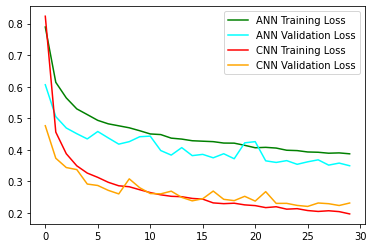

In [22]:
plt.figure()
plt.plot(loss1, color = 'green', label = 'ANN Training Loss')
plt.plot(val_loss1, color = 'cyan', label = 'ANN Validation Loss')
plt.plot(loss2,color = 'red', label = 'CNN Training Loss')
plt.plot(val_loss2, color = 'orange', label = 'CNN Validation Loss')
plt.legend()

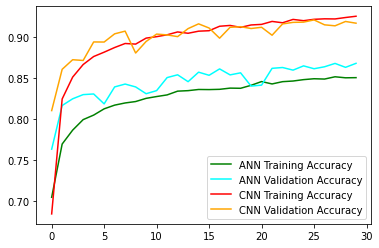

In [23]:
plt.figure()
plt.plot(acc1, color = 'green', label = 'ANN Training Accuracy')
plt.plot(val_acc1, color = 'cyan', label = 'ANN Validation Accuracy')
plt.plot(acc2,color = 'red', label = 'CNN Training Accuracy')
plt.plot(val_acc2, color = 'orange', label = 'CNN Validation Accuracy')
plt.legend()

In [24]:
ANN_model.predict(x_test[0:1])

1/1 [==============================] - 0s 144ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
CNN_model.predict(x_test[0:1])

1/1 [==============================] - 0s 185ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

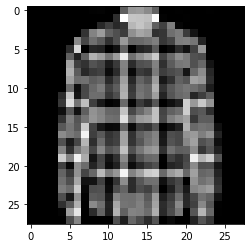

In [26]:
plt.imshow(x_test[7].reshape([28,28]), cmap = 'gray')

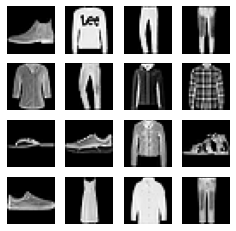

In [29]:
plt.figure(figsize = (4,4))
for i in range(16):
 plt.subplot(4,4,i+1)
 plt.axis('off')
 plt.imshow(x_test[i].reshape([28,28]), cmap = 'gray')

In [32]:
pred1 = np.argmax(ANN_model.predict(x_test[0:16]), axis =1)
pred1

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7, 4, 5, 5, 3, 4, 1])

In [31]:
pred2 = np.argmax(CNN_model.predict(x_test[0:16]), axis =1)
pred2

1/1 [==============================] - 0s 16ms/step


array([9, 2, 1, 1, 6, 1, 2, 6, 5, 5, 6, 5, 8, 6, 4, 1])

In [34]:
def detect_image_ANN(x):
  pred = np.argmax(ANN_model.predict(x), axis = 1)
  print('The given image is of type :', pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]), cmap = 'gray')

1/1 [==============================] - 0s 17ms/step
The given image is of type : 1


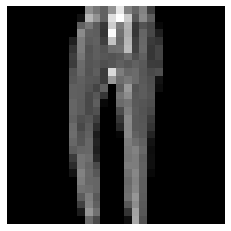

In [36]:
detect_image_ANN(x_test[80:81])

In [37]:
def detect_image_CNN(x):
  pred = np.argmax(CNN_model.predict(x), axis = 1)
  print('The given image is of type :', pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]), cmap = 'gray')

1/1 [==============================] - 0s 18ms/step
The given image is of type : 1


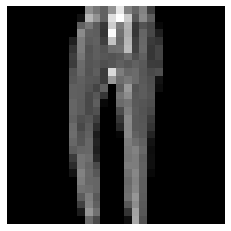

In [39]:
detect_image_CNN(x_test[80:81])